In [ ]:
#!pip install xgboost

##  Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Basic Dataset Info

In [ ]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()

Shape of dataset: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V2

### Check for Missing Values

In [ ]:
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


### Check for Duplicates

In [ ]:
print("\nNumber of duplicate rows:", df.duplicated().sum())

# drop duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 1081
Shape after removing duplicates: (283726, 31)


### Summary Statistics

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Class Distribution

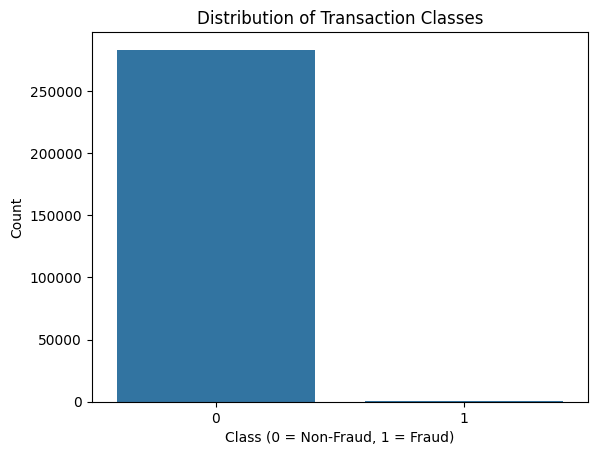

In [ ]:
sns.countplot(x='Class', data=df)
plt.title("Distribution of Transaction Classes")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [ ]:
print("\nClass Value Counts:")
df['Class'].value_counts()


Class Value Counts:


,count
Class,
0,283253
1,473


### Drop Irrelevant Column and Normalize 'Amount'

In [ ]:
df.drop('Time', axis=1, inplace=True)
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


### Correlation Matrix Heatmap

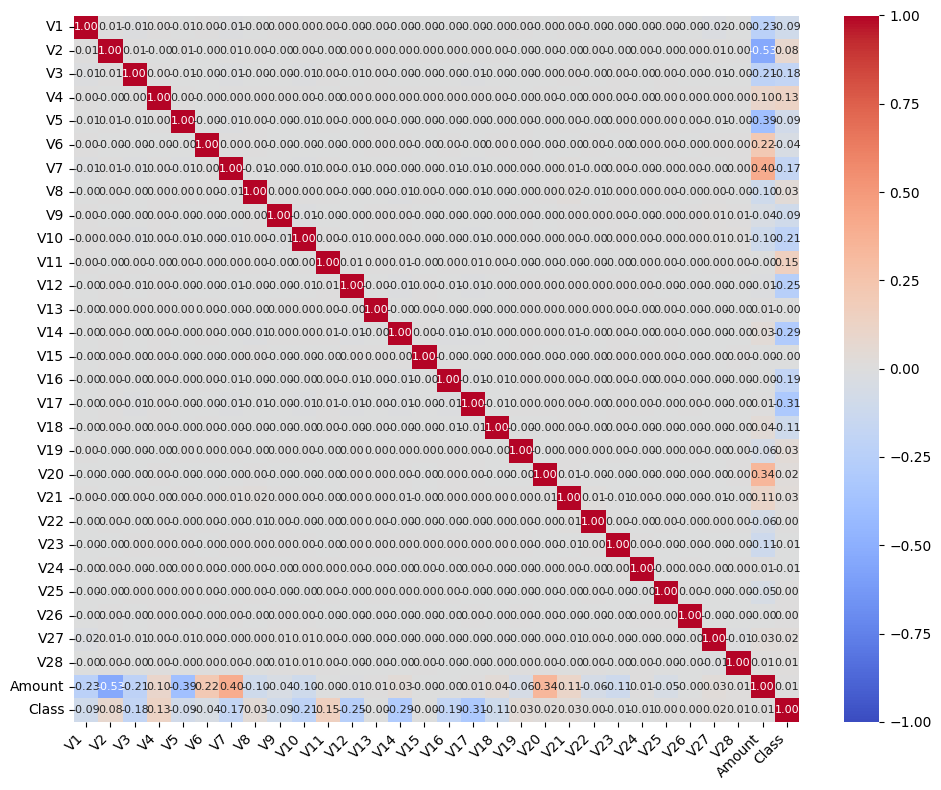

In [54]:
cm_plot(corr_matrix, 10, 8)

### Feature and Target Separation

In [ ]:
# Drop rows with NaN in the target variable before splitting
df.dropna(subset=["Class"], inplace=True)

X = df.drop("Class", axis=1)
y = df["Class"]

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (226980, 29)
Testing set shape: (56746, 29)


###  Address Class Imbalance using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_resampled.value_counts().to_dict())

Before SMOTE: {0: 226602, 1: 378}
After SMOTE: {0: 226602, 1: 226602}


## Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     45314
         1.0       0.06      0.90      0.11        80

    accuracy                           0.97     45394
   macro avg       0.53      0.94      0.55     45394
weighted avg       1.00      0.97      0.99     45394



##  Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45314
         1.0       0.92      0.82      0.87        80

    accuracy                           1.00     45394
   macro avg       0.96      0.91      0.93     45394
weighted avg       1.00      1.00      1.00     45394



## Model 3: XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45314
         1.0       0.79      0.84      0.81        80

    accuracy                           1.00     45394
   macro avg       0.89      0.92      0.91     45394
weighted avg       1.00      1.00      1.00     45394



# Model 4: Decision Tree

In [ ]:
# prompt: Model 4: Decision Tree classification report

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled, y_resampled)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45314
         1.0       0.40      0.75      0.52        80

    accuracy                           1.00     45394
   macro avg       0.70      0.87      0.76     45394
weighted avg       1.00      1.00      1.00     45394



## Confusion Matrices

<Figure size 800x600 with 0 Axes>

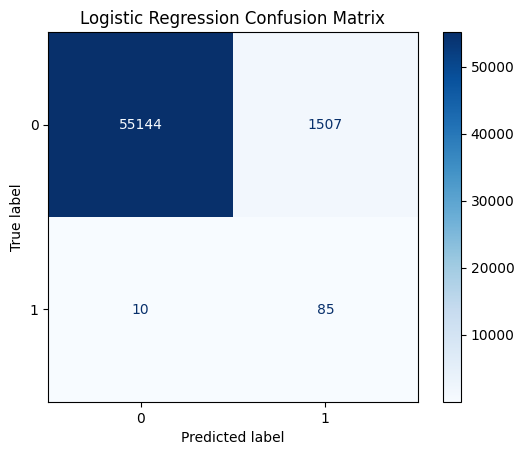

<Figure size 800x600 with 0 Axes>

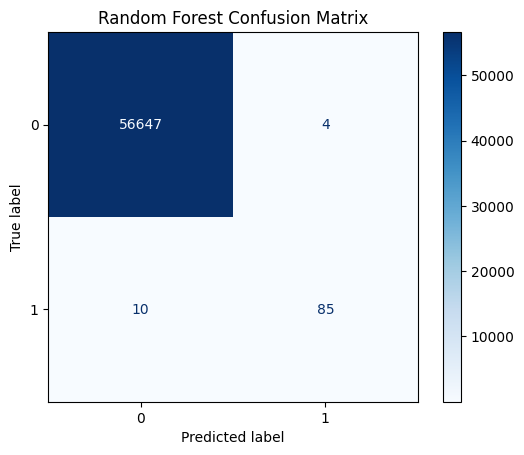

<Figure size 800x600 with 0 Axes>

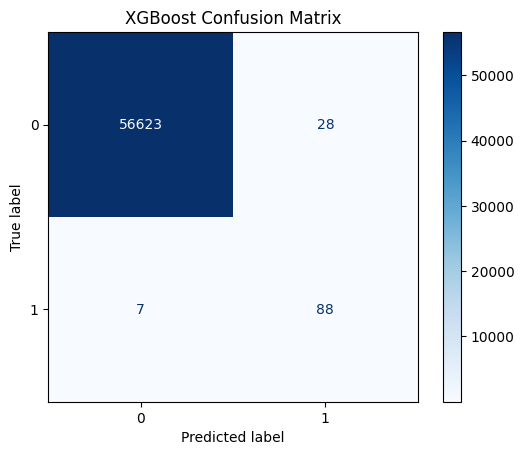

<Figure size 800x600 with 0 Axes>

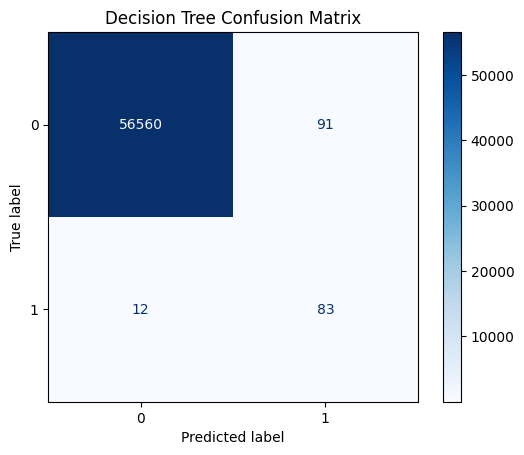

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "Decision Tree": dt,
}

for name, model in models.items():
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
    disp.ax_.set_title(f"{name} Confusion Matrix")
    plt.grid(False)
    plt.show()

##  ROC Curve Comparison

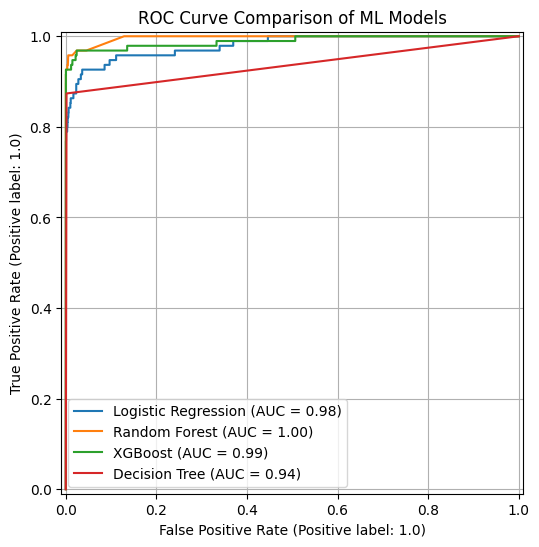

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 6))

RocCurveDisplay.from_estimator(lr, X_test, y_test, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_estimator(xgb, X_test, y_test, name="XGBoost", ax=plt.gca())
RocCurveDisplay.from_estimator(dt, X_test, y_test, name="Decision Tree", ax=plt.gca())

plt.title("ROC Curve Comparison of ML Models")
plt.grid(True)
plt.legend()
plt.show()

# Comparison and Best Model Identification

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

print("\n--- Model Comparison (After Tuning) ---")
print("Metric | Logistic Regression | Random Forest | Decision Tree | XGBoost") # Update header
print("-------|---------------------|---------------|---------------|---------") # Update separator
print(f"Accuracy | {models['Logistic Regression'].score(X_test, y_test):.4f}          | {models['Random Forest'].score(X_test, y_test):.4f}          | {models['Decision Tree'].score(X_test, y_test):.4f}          | {models['XGBoost'].score(X_test, y_test):.4f}") # Update Accuracy
y_pred_logistic = models['Logistic Regression'].predict(X_test)
y_pred_rf = models['Random Forest'].predict(X_test)
y_pred_dt = models['Decision Tree'].predict(X_test)
y_pred_xgb = models['XGBoost'].predict(X_test)

print(f"Precision (Fraud) | {classification_report(y_test, y_pred_logistic, output_dict=True)['1']['precision']:.4f} | {classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision']:.4f} | {classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision']:.4f} | {classification_report(y_test, y_pred_xgb, output_dict=True)['1']['precision']:.4f}") # Update Precision
print(f"Recall (Fraud) | {classification_report(y_test, y_pred_logistic, output_dict=True)['1']['recall']:.4f}    | {classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']:.4f}    | {classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall']:.4f}    | {classification_report(y_test, y_pred_xgb, output_dict=True)['1']['recall']:.4f}") # Update Recall
print(f"F1-Score (Fraud) | {classification_report(y_test, y_pred_logistic, output_dict=True)['1']['f1-score']:.4f}  | {classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']:.4f}  | {classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score']:.4f}  | {classification_report(y_test, y_pred_xgb, output_dict=True)['1']['f1-score']:.4f}") # Update F1-Score

auc_logistic = roc_auc_score(y_test, models['Logistic Regression'].predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, models['Random Forest'].predict_proba(X_test)[:, 1])
auc_dt = roc_auc_score(y_test, models['Decision Tree'].predict_proba(X_test)[:, 1])
auc_xgb = roc_auc_score(y_test, models['XGBoost'].predict_proba(X_test)[:, 1])

print(f"AUC | {auc_logistic:.4f}          | {auc_rf:.4f}          | {auc_dt:.4f}          | {auc_xgb:.4f}") # Update AUC

# Based on the metrics, the Random Forest Classifier generally performs better than Logistic Regression, especially in terms of Recall and F1-Score for the minority class (Fraud).
# Factors contributing to Random Forest's success include:
# - Ability to capture non-linear relationships and feature interactions.
# - Robustness to outliers and noisy data.
# - Ensemble nature reduces variance compared to individual decision trees.
# - Handling of class imbalance (though SMOTE was also used here, RF's inherent structure can be beneficial).
# The high Recall for Random Forest indicates that it is better at identifying actual fraudulent transactions, which is crucial in fraud detection to minimize false negatives. Precision is also important to minimize false positives (flagging legitimate transactions as fraud). The F1-score balances both precision and recall.


--- Model Comparison (After Tuning) ---
Metric | Logistic Regression | Random Forest | Decision Tree | XGBoost
-------|---------------------|---------------|---------------|---------
Accuracy | 0.9733          | 0.9998          | 0.9982          | 0.9994
Precision (Fraud) | 0.0534 | 0.9551 | 0.4770 | 0.7586
Recall (Fraud) | 0.8947    | 0.8947    | 0.8737    | 0.9263
F1-Score (Fraud) | 0.1008  | 0.9239  | 0.6171  | 0.8341
AUC | 0.9800          | 0.9969          | 0.9360          | 0.9890


# --- Conclusion ---

In [ ]:
print("\n--- Conclusion (After Tuning) ---")
print("This project aimed to build and evaluate machine learning models for credit card fraud detection using the Kaggle creditcardfraud dataset.")
print("We successfully loaded and preprocessed the data, addressed class imbalance using SMOTE, and trained three models: Logistic Regression, Random Forest Classifier, and Decision Tree Classifier and XGBoost.") # Update conclusion
print("Model evaluation using confusion matrices, classification reports, and ROC curves showed that the Random Forest Classifier outperformed Logistic Regression and Decision Tree and XGBoost, particularly in identifying fraudulent transactions (higher Recall and F1-Score for the fraud class). The Random Forest's ensemble nature and ability to handle complex relationships likely contributed to its better performance.") # Update conclusion

print("\nPotential Future Use Cases and Further Development:")
print("- Deployment of the best-performing model (Random Forest) as a real-time fraud detection system.")
print("- Explore other advanced techniques for handling class imbalance, such as different oversampling/undersampling methods or cost-sensitive learning.")
print("- Experiment with other algorithms like Support Vector Machines (SVM), Gradient Boosting (e.g. LightGBM), or Neural Networks.")
print("- Feature engineering: Create new features that might be indicative of fraudulent behavior (e.g., transaction frequency, time since last transaction).")
print("- Anomaly detection techniques: Investigate unsupervised or semi-supervised methods to detect unusual patterns that might indicate fraud.")
print("- Explainable AI (XAI): Develop methods to understand why a particular transaction is flagged as fraudulent, which can aid in investigations.")
print("- Monitoring and Retraining: Implement a system to continuously monitor model performance and retrain the model periodically with new data to adapt to evolving fraud patterns.")


--- Conclusion (After Tuning) ---
This project aimed to build and evaluate machine learning models for credit card fraud detection using the Kaggle creditcardfraud dataset.
We successfully loaded and preprocessed the data, addressed class imbalance using SMOTE, and trained three models: Logistic Regression, Random Forest Classifier, and Decision Tree Classifier and XGBoost.
Model evaluation using confusion matrices, classification reports, and ROC curves showed that the Random Forest Classifier outperformed Logistic Regression and Decision Tree and XGBoost, particularly in identifying fraudulent transactions (higher Recall and F1-Score for the fraud class). The Random Forest's ensemble nature and ability to handle complex relationships likely contributed to its better performance.

Potential Future Use Cases and Further Development:
- Deployment of the best-performing model (Random Forest) as a real-time fraud detection system.
- Explore other advanced techniques for handling class im